In [ ]:
from google.colab import files
data=files.upload()

Saving lang_detect_dataset2.csv to lang_detect_dataset2.csv


In [ ]:
!pip install translate
!pip install googletrans==3.1.0a0


     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 43.4 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 65 kB 3.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=1c2549e053e162ced17e700ae1bb2932d994bac09b952a48b55279a0c22b2f7d
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings



warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("lang_detect_dataset2.csv")

In [ ]:
data.sample(10)

,Text,Language
5210,La información obtenida por un algoritmo de ap...,Spanish
9271,"Was sagst du, wir gehen ins Kino?",German
7187,"Uno dei principi alla base di Wikipedia è il ""...",Italian
2015,तुमसे मिलना अच्छा। बहुत समय से मिले नहीं। क्या...,Hindi
2955,"Olá pessoal, sejam bem vindos ao meu canal nes...",Portugeese
9600,ನನಗೆ ಆಸಕ್ತಿಯಿಲ್ಲ.,Kannada
6936,Vi ses senere.,Danish
6045,"(Естественно, для того, чтобы обнаружить и уда...",Russian
8738,vilket betyder vilket uppmanar personen att up...,Sweedish
9647,ನಾನು ಒಂದು ಕ್ಷಣ ಯೋಚಿಸೋಣ.,Kannada


In [ ]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [ ]:
X = data["Text"]
Y = data["Language"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [ ]:
data_list = []
for text in X:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9\[\]]', '', text)
    text = text.lower()
    data_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,  y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(f'accuracy = {round(ac * 100, 2)} %')

accuracy = 98.01 %


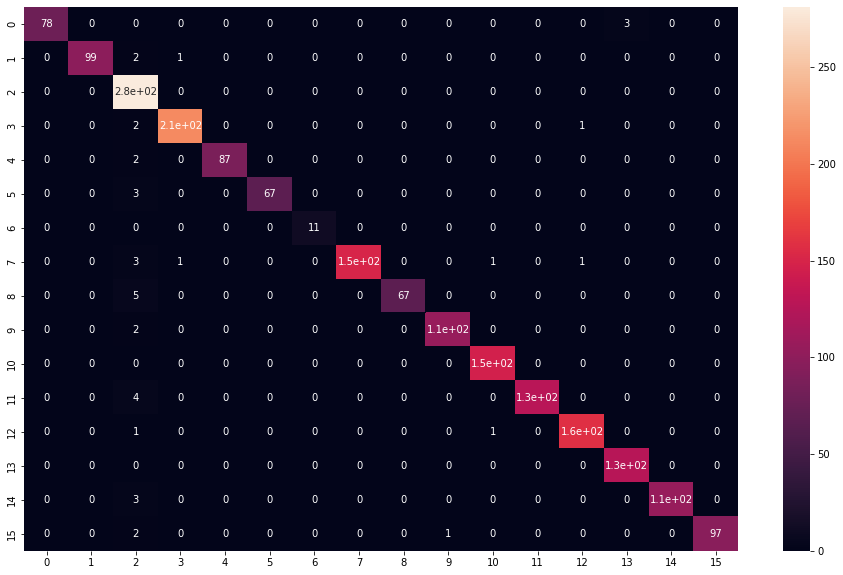

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(cm, annot = True)
plt.show()


In [ ]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    
    print(f'The text is in {lang[0]} language')

In [ ]:
predict("Skeletor aparece vandalizando el artÃ­culo de He-Man.")


The text is in Spanish language


In [ ]:
predict("Woah This Works")

The text is in English language


In [ ]:
predict("Je m'appelle Rayyan")

The text is in French language


In [ ]:
import nltk
import translate
nltk.download('punkt')
from nltk import sent_tokenize

from googletrans import Translator

translator = Translator()

from translate import Translator
translator= Translator(to_lang="de")
translation = translator.translate("This is a pen.")
print(translation)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Das ist ein Gehege.


In [ ]:
from googletrans import Translator, constants
from pprint import pprint


In [ ]:
from googletrans import Translator, constants
from pprint import pprint
translator = Translator()
translation = translator.translate("Hello my name is Rayyan", dest="en")
print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")

Hello my name is Rayyan (en) --> Hello my name is Rayyan (en)
